___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [56]:
from pandas_datareader import data, wb
import yfinance as yf
yf.pdr_override()
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [58]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

In [62]:
# BANK OF AMERICA
BAC = data.get_data_yahoo("BAC", start, end)

# CitiGroup
C = data.get_data_yahoo("C", start, end)

# Goldman
GS = data.get_data_yahoo("GS", start, end)

#JPMorgan Chase
JMP = data.get_data_yahoo("JMP", start, end)

#Morgan Stanley
MS = data.get_data_yahoo("MS", start, end)

#Wells Fargo
WFC = data.get_data_yahoo("WFC", start, end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['JMP']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [64]:
tickers =["BAC", "C", "GS", "JMP", "MS", "WFC"]

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [68]:
bank_stocks = pd.concat([BAC, C, GS, JMP, MS, WFC], axis=1, keys=tickers)

** Set the column name levels (this is filled out for you):**

In [70]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [74]:
bank_stocks.head()

Bank Ticker                BAC                                              \
Stock Info                Open       High        Low      Close  Adj Close   
Date                                                                         
2006-01-03 00:00:00  46.919998  47.180000  46.150002  47.080002  31.750565   
2006-01-04 00:00:00  47.000000  47.240002  46.450001  46.580002  31.413383   
2006-01-05 00:00:00  46.580002  46.830002  46.320000  46.639999  31.453836   
2006-01-06 00:00:00  46.799999  46.910000  46.349998  46.570000  31.406618   
2006-01-09 00:00:00  46.720001  46.970001  46.360001  46.599998  31.426859   

Bank Ticker                             C                                      \
Stock Info             Volume        Open        High         Low       Close   
Date                                                                            
2006-01-03 00:00:00  16296700  490.000000  493.799988  481.100006  492.899994   
2006-01-04 00:00:00  17757900  488.600006  491.000000  483.500000  483.799988   
2006-01-05 00:00:00  14970700  484.399994  487.799988  484.000000  486.200012   
2006-01-06 00:00:00  12599800  488.799988  489.000000  482.000000  486.200012   
2006-01-09 00:00:00  15619400  486.000000  487.399994  483.000000  483.899994   

Bank Ticker          ...         MS                                       WFC  \
Stock Info           ...        Low      Close  Adj Close   Volume       Open   
Date                 ...                                                        
2006-01-03 00:00:00  ...  56.740002  58.310001  32.955109  5377000  31.600000   
2006-01-04 00:00:00  ...  58.349998  58.349998  32.977699  7977800  31.799999   
2006-01-05 00:00:00  ...  58.020000  58.509998  33.068138  5778000  31.500000   
2006-01-06 00:00:00  ...  58.049999  58.570000  33.102051  6889800  31.580000   
2006-01-09 00:00:00  ...  58.619999  59.189999  33.452446  4144500  31.674999   

Bank Ticker                                                                
Stock Info                High        Low      Close  Adj Close    Volume  
Date                                                                       
2006-01-03 00:00:00  31.975000  31.195000  31.900000  19.124546  11016400  
2006-01-04 00:00:00  31.820000  31.365000  31.530001  18.902733  10870000  
2006-01-05 00:00:00  31.555000  31.309999  31.495001  18.881748  10158000  
2006-01-06 00:00:00  31.775000  31.385000  31.680000  18.992649   8403800  
2006-01-09 00:00:00  31.825001  31.555000  31.674999  18.989656   5619600  

[5 rows x 36 columns]

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker             ...        MS                                  WFC  \
Stock Info    Volume    ...      Open   High    Low  Close   Volume   Open   
Date                    ...                                                  
2006-01-03   1537660    ...     57.17  58.49  56.74  58.31  5377000  31.60   
2006-01-04   1871020    ...     58.70  59.28  58.35  58.35  7977800  31.80   
2006-01-05   1143160    ...     58.55  58.59  58.02  58.51  5778000  31.50   
2006-01-06   1370250    ...     58.77  58.85  58.05  58.57  6889800  31.58   
2006-01-09   1680740    ...     58.63  59.29  58.62  59.19  4144500  31.68   

Bank Ticker                                 
Stock Info    High    Low  Close    Volume  
Date                                        
2006-01-03   31.98  31.20  31.90  11016400  
2006-01-04   31.82  31.36  31.53  10871000  
2006-01-05   31.56  31.31  31.50  10158000  
2006-01-06   31.78  31.38  31.68   8403800  
2006-01-09   31.82  31.56  31.68   5619600  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [78]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JMP           NaN
MS      89.300003
WFC     58.520000
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [80]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [114]:
for tick in tickers:
    returns[tick+"Return"] = bank_stocks[tick]['Close'].pct_change()
returns.head()

C:\Users\Aleja\AppData\Local\Temp\ipykernel_18676\1869530214.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns[tick+"Return"] = bank_stocks[tick]['Close'].pct_change()


,BACReturn,CReturn,GSReturn,JMPReturn,MSReturn,WFCReturn
Date,,,,,,
2006-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04 00:00:00,-0.010620,-0.018462,-0.013812,NaN,0.000686,-0.011599
2006-01-05 00:00:00,0.001288,0.004961,-0.000393,NaN,0.002742,-0.001110
2006-01-06 00:00:00,-0.001501,0.000000,0.014169,NaN,0.001025,0.005874
2006-01-09 00:00:00,0.000644,-0.004731,0.012030,NaN,0.010586,-0.000158


,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

C:\Users\Aleja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Aleja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Aleja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Aleja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

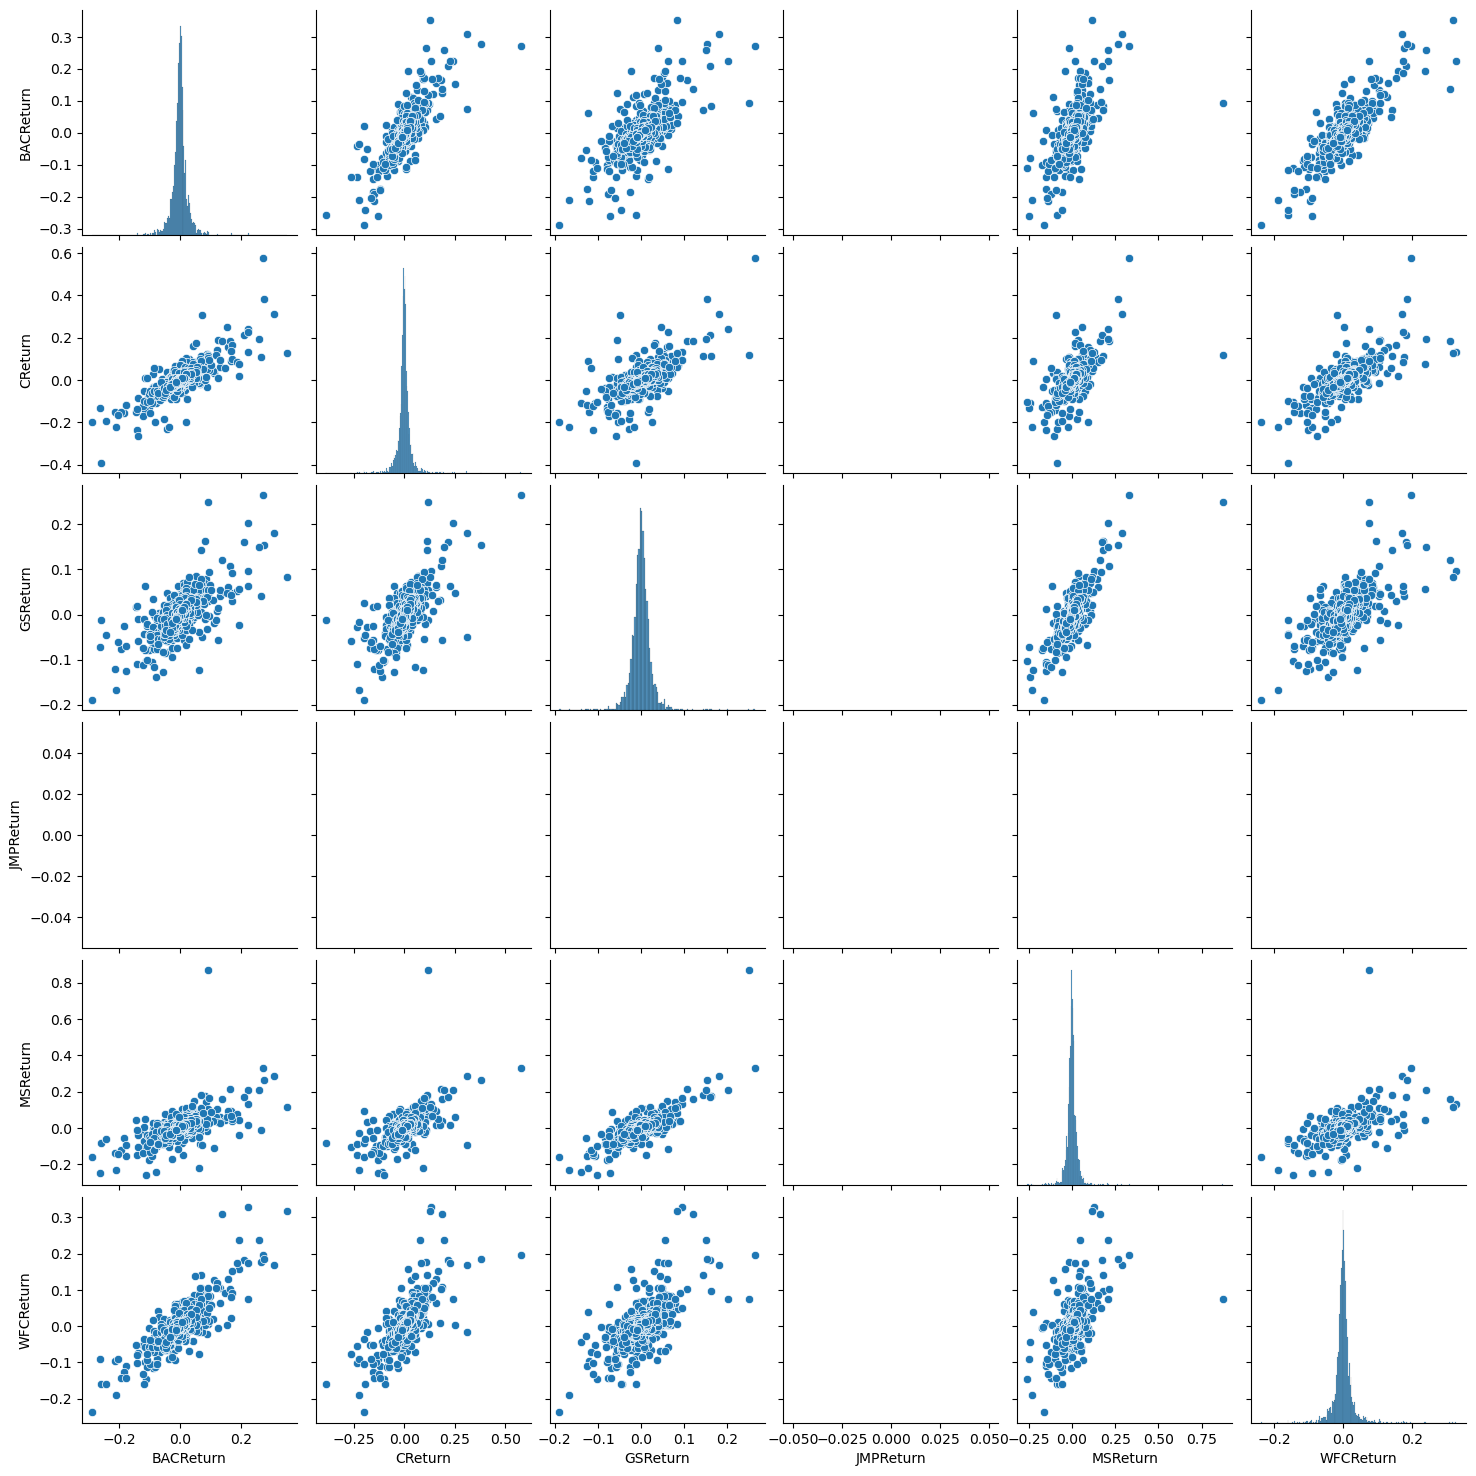

In [91]:
import seaborn as sns
sns.pairplot(returns[1:])

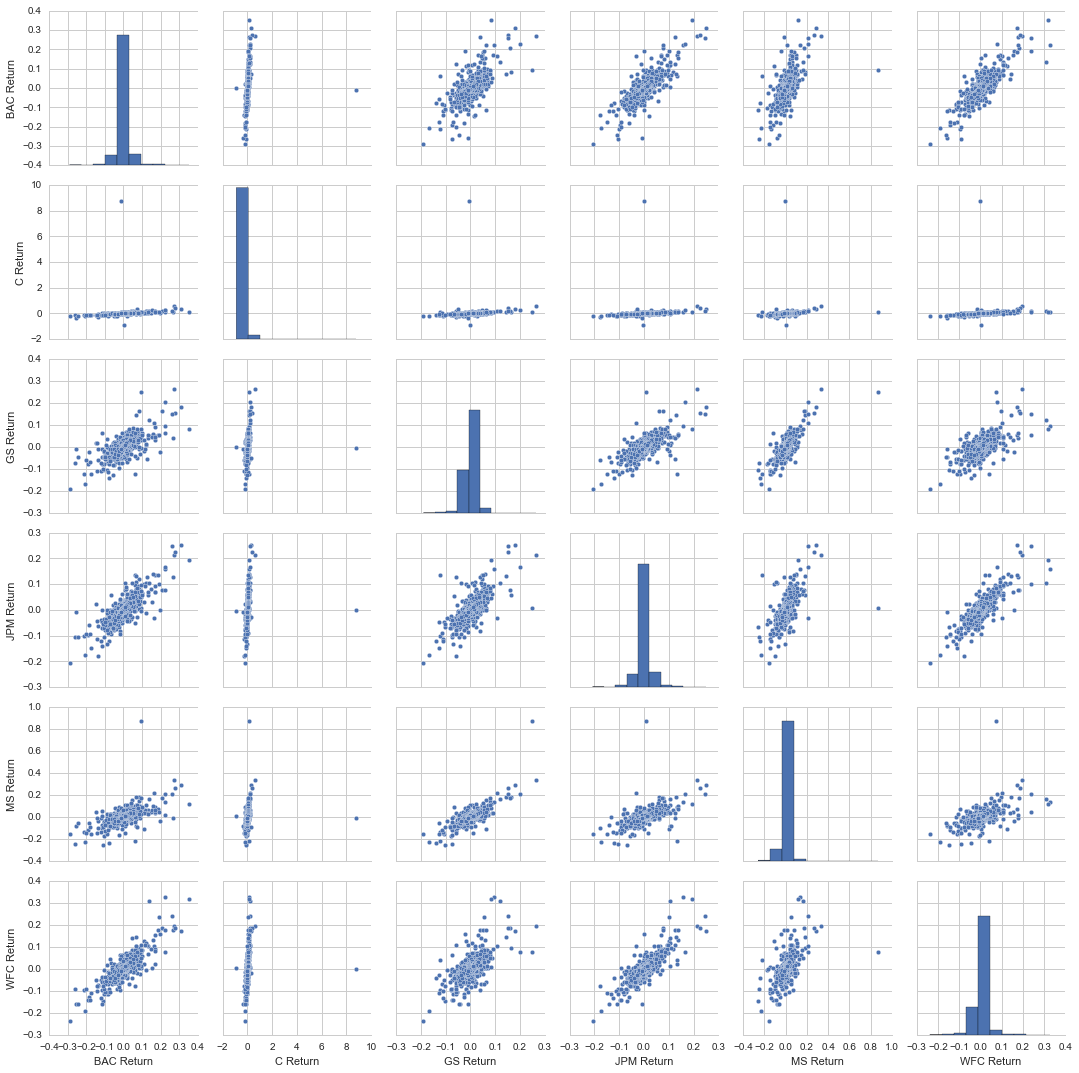

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [95]:
returns.idxmin()

C:\Users\Aleja\AppData\Local\Temp\ipykernel_18676\1464730999.py:1: FutureWarning: The behavior of DataFrame.idxmin with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  returns.idxmin()


BACReturn   2009-01-20
CReturn     2009-02-27
GSReturn    2009-01-20
JMPReturn          NaT
MSReturn    2008-10-09
WFCReturn   2009-01-20
dtype: datetime64[ns]

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

In [98]:
returns.idxmax()

C:\Users\Aleja\AppData\Local\Temp\ipykernel_18676\2130680741.py:1: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  returns.idxmax()


BACReturn   2009-04-09
CReturn     2008-11-24
GSReturn    2008-11-24
JMPReturn          NaT
MSReturn    2008-10-13
WFCReturn   2008-07-16
dtype: datetime64[ns]

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [103]:
returns.std()

BACReturn    0.036647
CReturn      0.038672
GSReturn     0.025390
JMPReturn         NaN
MSReturn     0.037819
WFCReturn    0.030238
dtype: float64

In [150]:

returns[2015-1-1:2015-12-31].std()

BACReturn   NaN
CReturn     NaN
GSReturn    NaN
JMPReturn   NaN
MSReturn    NaN
WFCReturn   NaN
dtype: float64

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

C:\Users\Aleja\AppData\Local\Temp\ipykernel_18676\2043491771.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns[2015:2016]['MSReturn'],color='green',bins=50)
C:\Users\Aleja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Aleja\anaconda3\Lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax

<Axes: xlabel='MSReturn', ylabel='Density'>

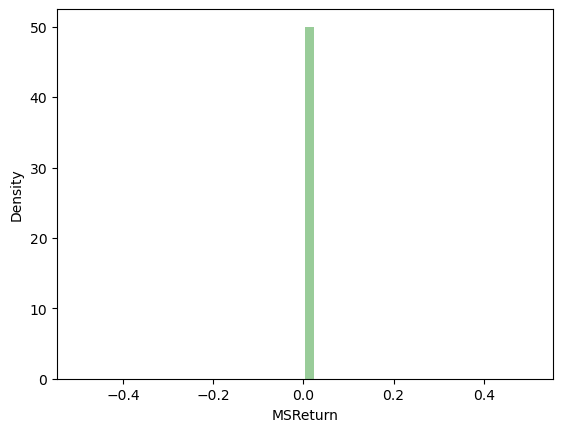

In [158]:
sns.distplot(returns[2015:2016]['MSReturn'],color='green',bins=50)

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

C:\Users\Aleja\AppData\Local\Temp\ipykernel_18676\1010036423.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns[2008:2009]['CReturn'],color='red',bins=100)
C:\Users\Aleja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Aleja\anaconda3\Lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=a

<Axes: xlabel='CReturn', ylabel='Density'>

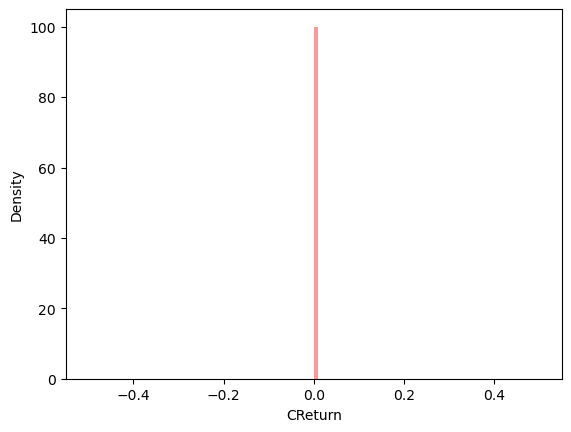

In [170]:
sns.distplot(returns[2008:2009]['CReturn'],color='red',bins=100)

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

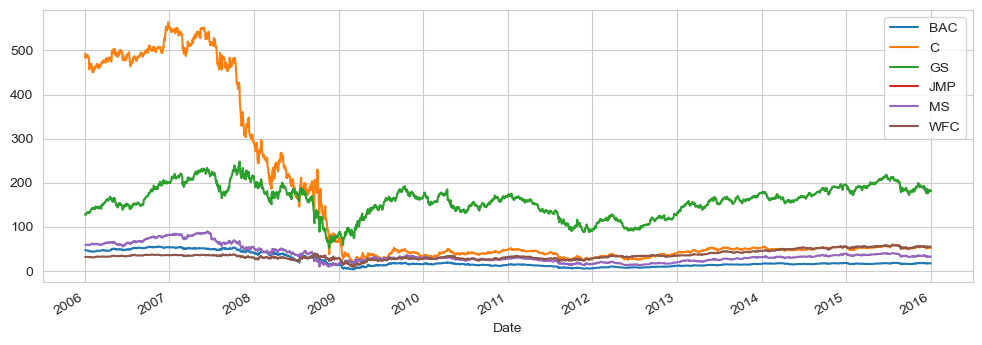

In [177]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

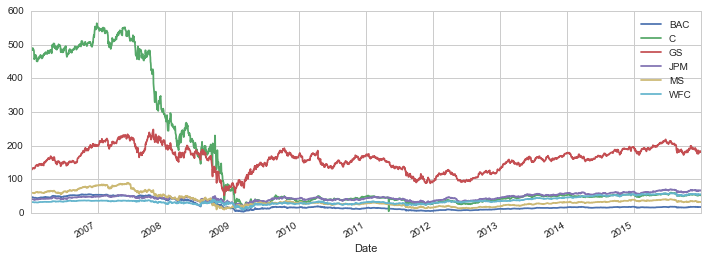

<Axes: xlabel='Date'>

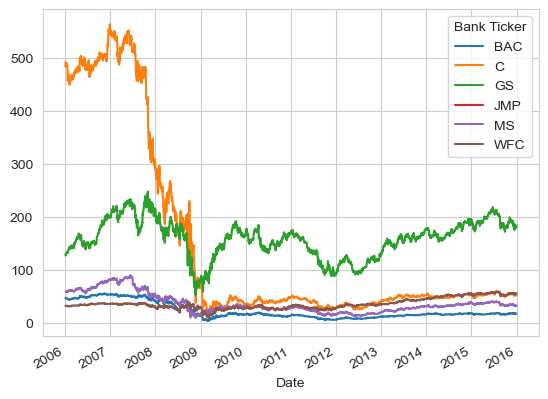

In [180]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

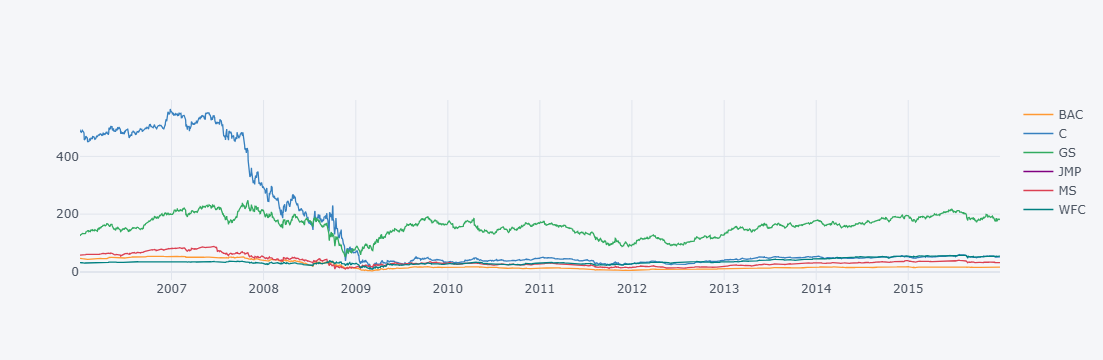

In [183]:
# plotly
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

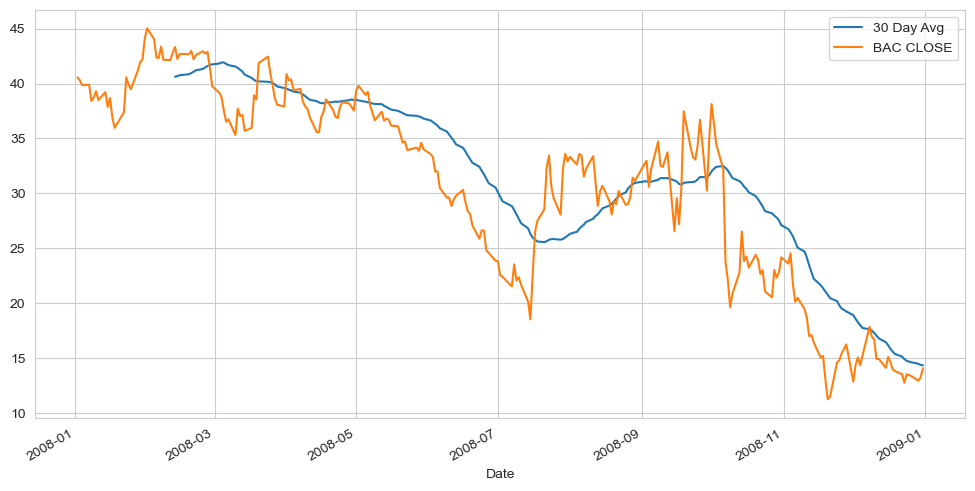

In [188]:
plt.figure(figsize=(12,6))
BAC['Close']['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close']['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

C:\Users\Aleja\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

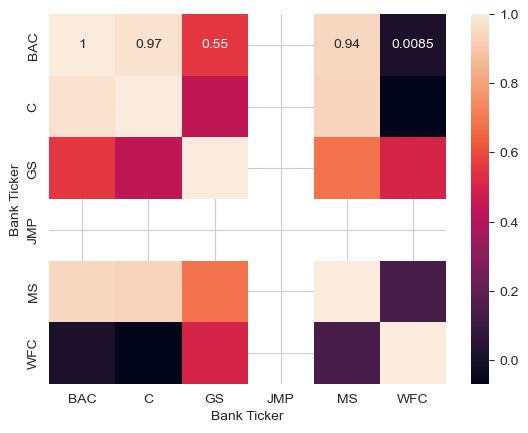

In [195]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

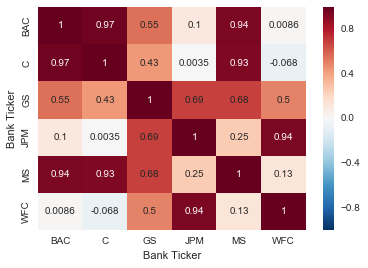

** Optional: Use seaborn's clustermap to cluster the correlations together:**

ValueError: The condensed distance matrix must contain only finite values.

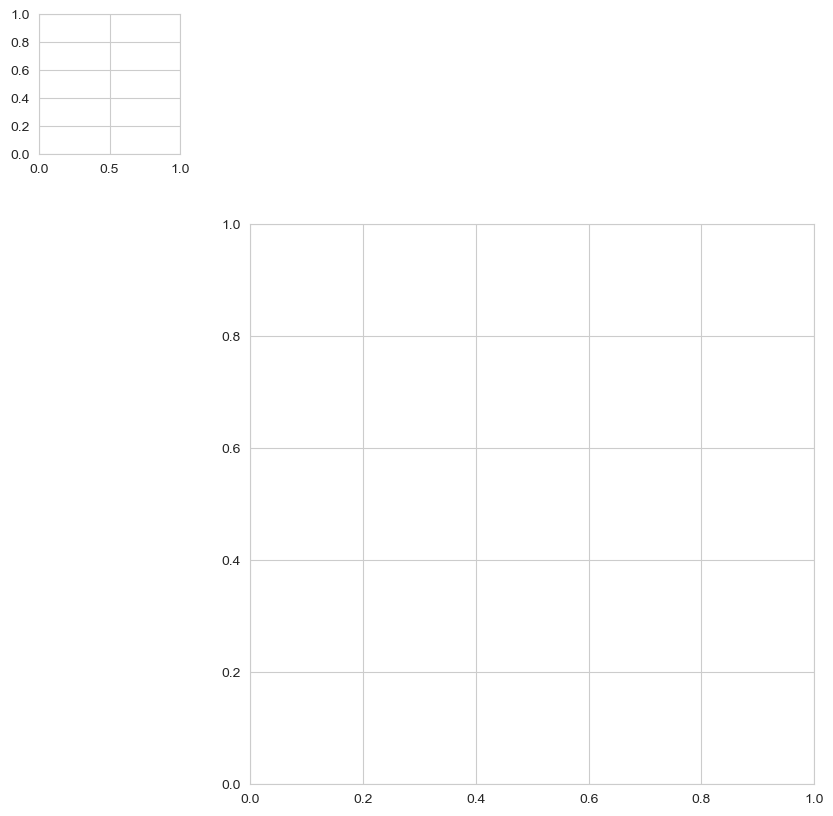

In [200]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

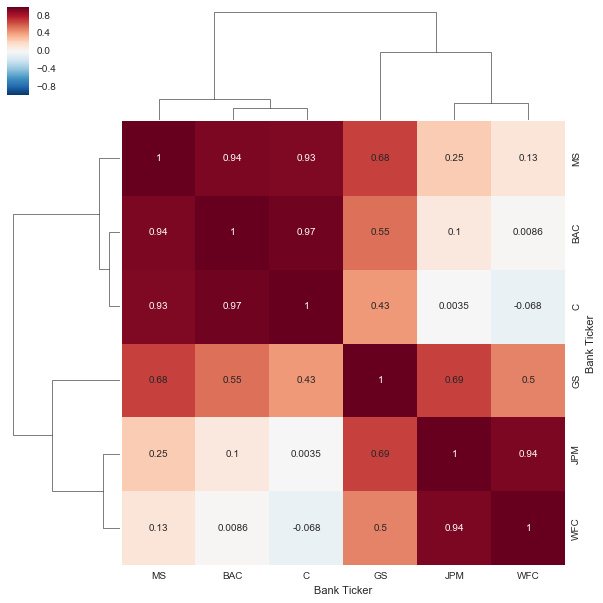

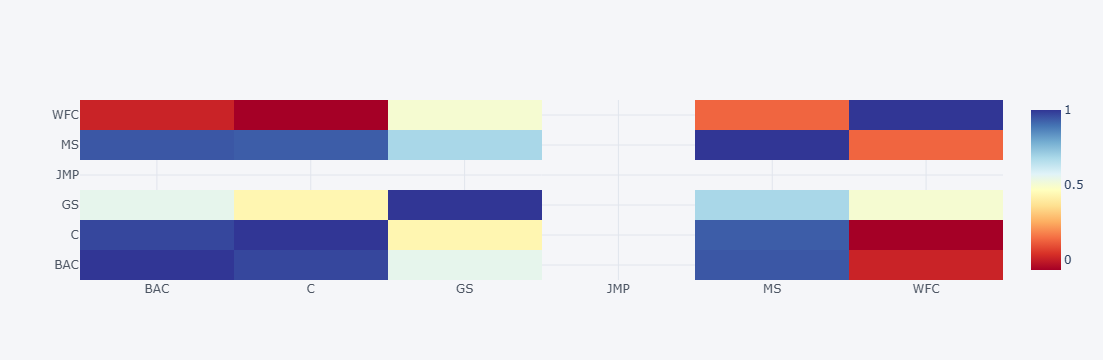

In [202]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

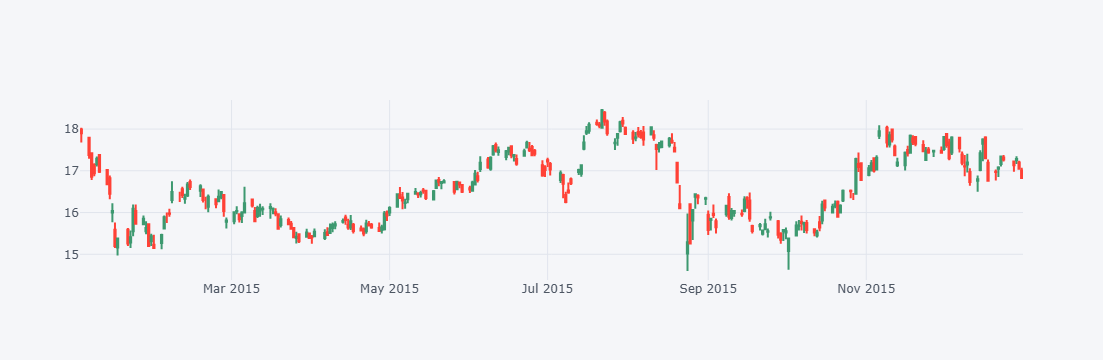

In [204]:
BAC[['Open', 'High', 'Low', 'Close']]['2015-01-01':'2016-01-01'].iplot(kind='candle')

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

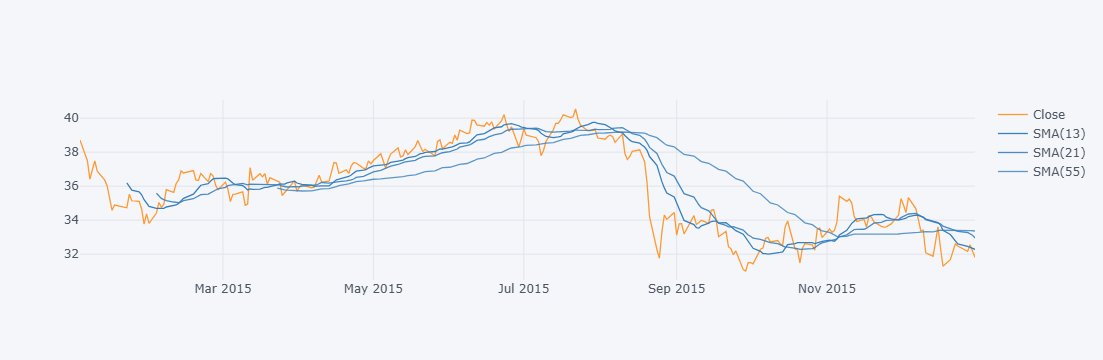

In [206]:
MS['Close']['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

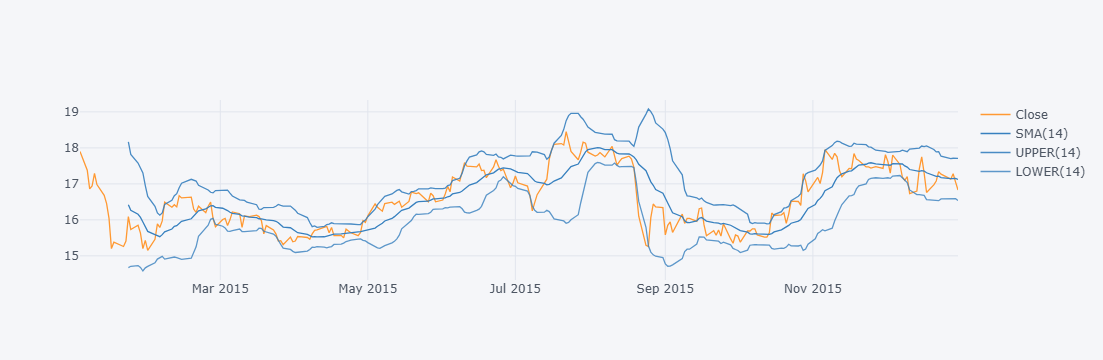

In [208]:
BAC['Close']['2015-01-01':'2016-01-01'].ta_plot(study='boll')

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.